<a href="https://colab.research.google.com/github/Guerouan/machine-learning/blob/master/Predicting_Boston's_expenses_ws.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to machine learning**

---


**Resume:** In this project, we will develop and evaluate the performance and the predictive power of a model trained and tested on data collected from houses in Boston’s suburbs.
Once we get a good fit, we will use this model to predict the monetary value of a house located at the Boston’s area.
A model like this would be very valuable for a real state agent who could make use of the information provided in a dayly basis.



## **1: Taking data into account**


The dataset used in this project comes from the UCI Machine Learning Repository. This data was collected in 1978 and each of the 506 entries represents aggregate information about 14 features of homes from various suburbs located in Boston.

The features can be summarized as follows:

-CRIM: This is the per capita crime rate by town

-ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.

-INDUS: This is the proportion of non-retail business acres per town.

-CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)

-NOX: This is the nitric oxides concentration (parts per 10 million)

-RM: This is the average number of rooms per dwelling

-AGE: This is the proportion of owner-occupied units built prior to 1940

-DIS: This is the weighted distances to five Boston employment centers

-RAD: This is the index of accessibility to radial highways

-TAX: This is the full-value property-tax rate per $10,000

-PTRATIO: This is the pupil-teacher ratio by town

-B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town

-LSTAT: This is the percentage lower status of the population

-MEDV: This is the median value of owner-occupied homes in $1000s

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy 
! pip install shap
import shap

# read data 
x_train,label = shap.datasets.boston()

In [3]:
data = x_train.copy()
data["MEDV"] = label
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

## **2- Exploration**
Even if the data do not have any particular defects, a preliminary exploratory study is essential in order to ensure their good coherence, propose possible transformations and analyse correlation structures or more generally links between variables, groups of individuals or observations.

### **2.1- One-dimensional exploration**

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

(0, 104.855)

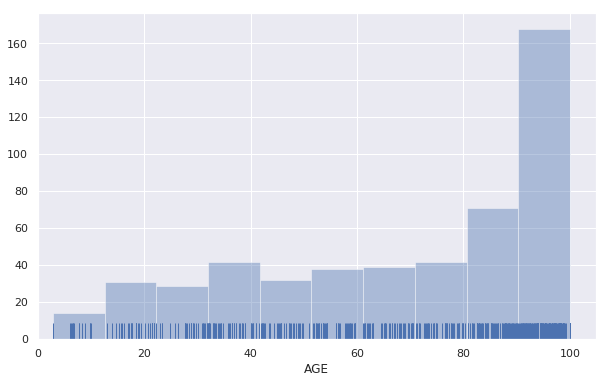

In [6]:
plt.figure(figsize=(10,6))
sns.distplot(data.AGE, bins=10, kde=False, rug=True)
plt.xlim(0, )

(-10, 131.56753473627424)

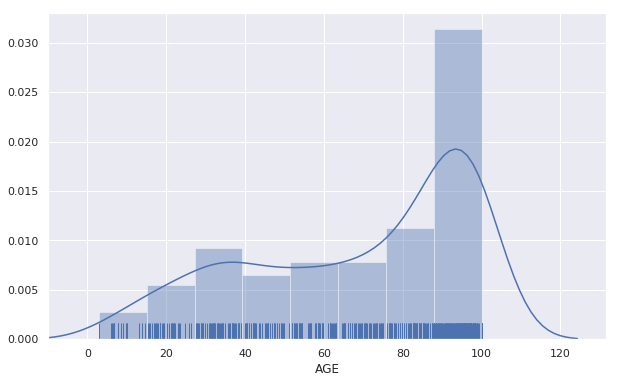

In [7]:
from scipy import stats
plt.figure(figsize=(10,6))
sns.distplot(data.AGE, rug=True)#, fit=stats.gamma);
plt.xlim(-10,)

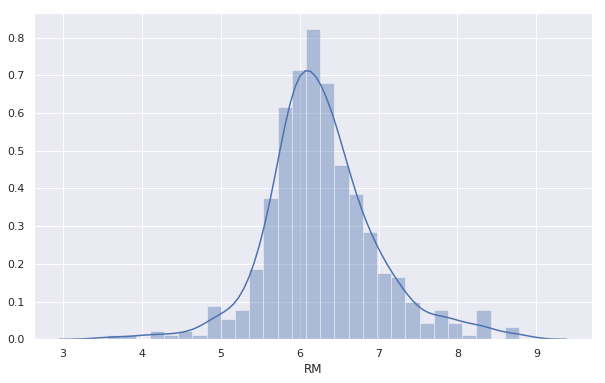

In [8]:
plt.figure(figsize=(10,6))
sns.distplot(data.RM)


**Exercice**:  Deal with all variables in this way and try to extract knowldge

### **2.2-Multi-dimensional Exploration**

In [0]:
#it take time to compute use simple heartmaps

#plt.figure(figsize=(15,15))
#sns.set(style="white")
#g = sns.PairGrid(x_train, diag_sharey=False)
#g.map_lower(sns.kdeplot)
#g.map_upper(sns.scatterplot)
#g.map_diag(sns.kdeplot, lw=3)

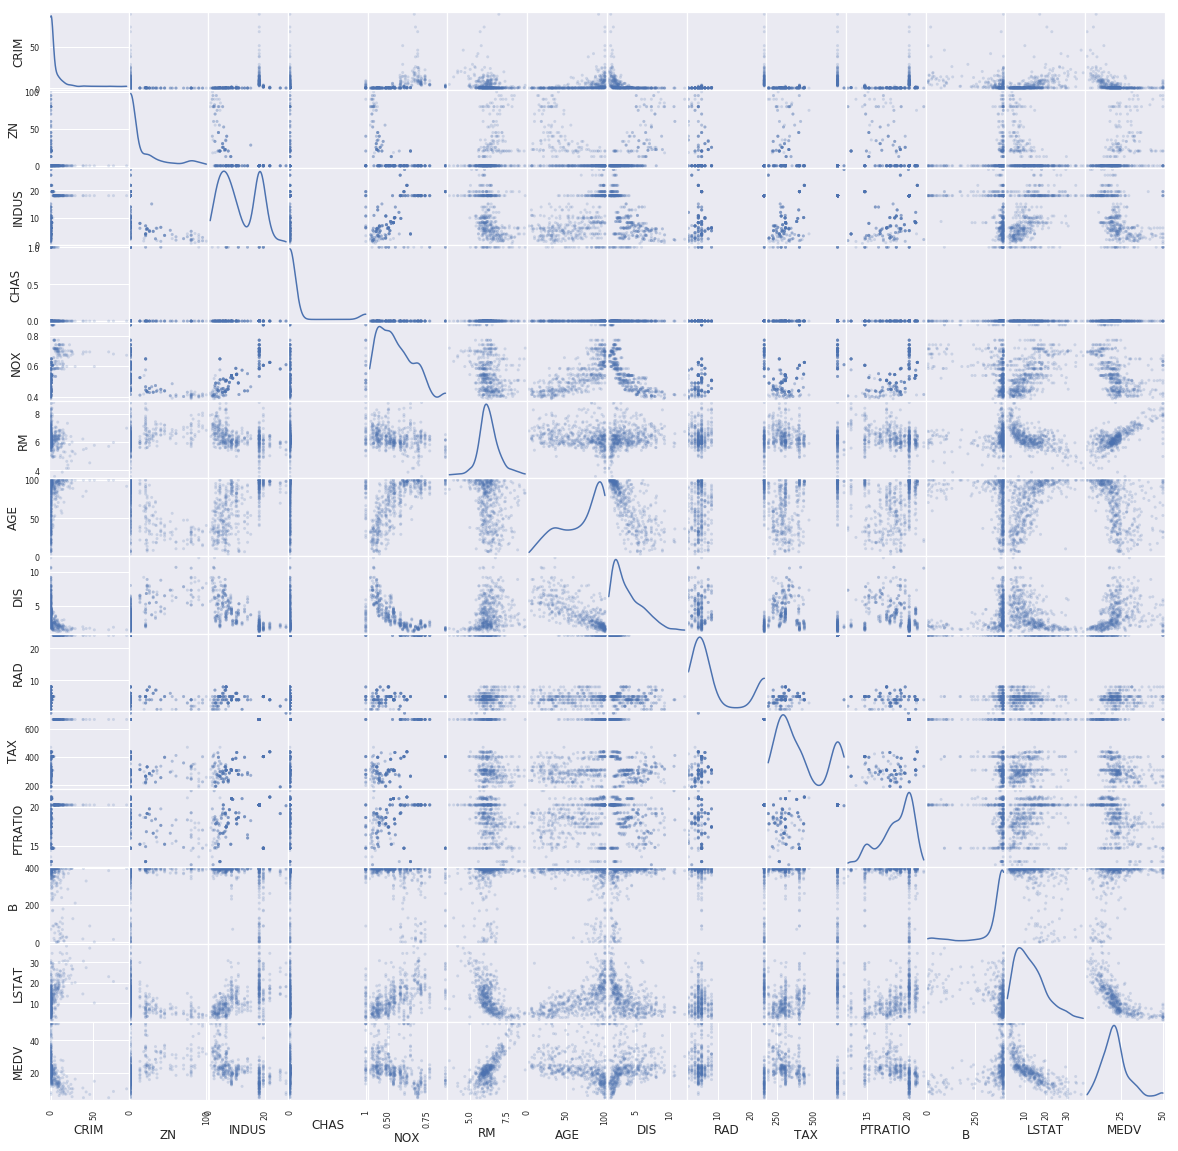

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.2, figsize=(20, 20), diagonal='kde')
plt.show()

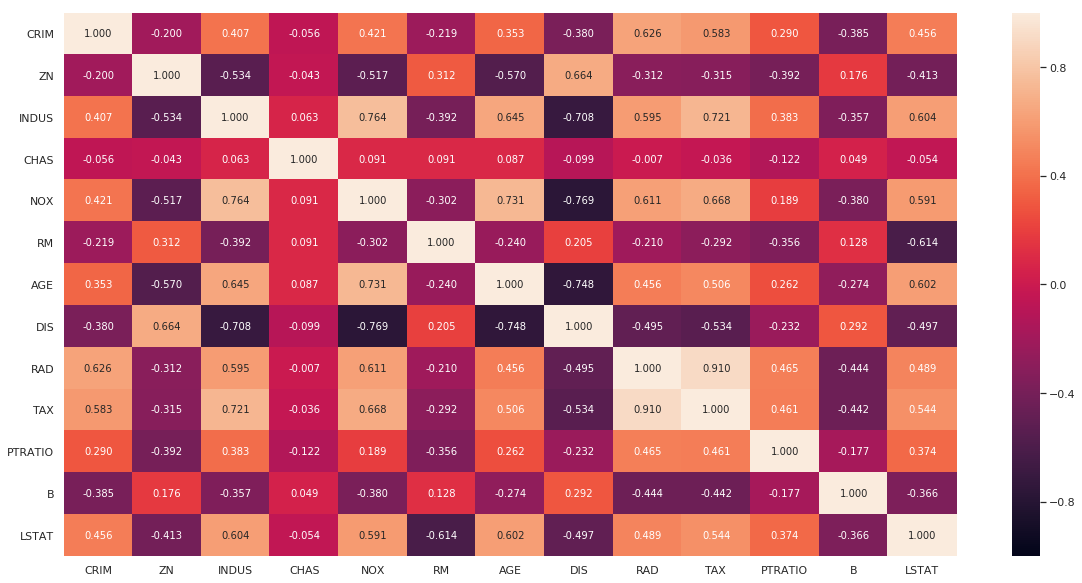

In [11]:
plt.figure(figsize = (20, 10))

sns.heatmap(x_train.corr(), annot = True, vmin = -1, vmax = 1, fmt = '.3f')

In [0]:
data["priceSeuil"]=data["MEDV"].map(lambda x: x > np.mean(label))

### *2.3-Principal component analysis-PCA*

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
#features reduction


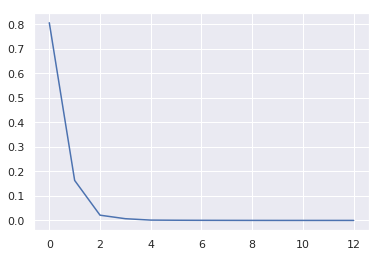

In [14]:
pca = PCA()
## Estimation, calcul des composantes principales
C = pca.fit(x_train).transform(x_train)
## Décroissance de la variance expliquée
plt.plot(pca.explained_variance_ratio_)
plt.show()

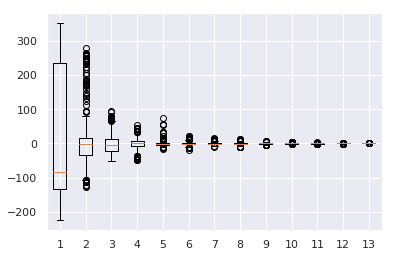

In [15]:
plt.boxplot(C[:,0:20])
plt.show()

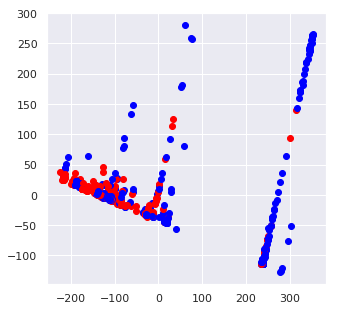

In [16]:
plt.figure(figsize=(5,5))
for i, j, nom in zip(C[:,0], C[:,1], data["priceSeuil"]):
    color = "red" if nom  else "blue"
    plt.plot(i, j, "o",color=color)  
plt.show()

In [0]:
#coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
#coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
#fig = plt.figure(figsize=(5,5))
#ax = fig.add_subplot(1, 1, 1)
#for i, j, nom in zip(coord1,coord2, x_train.columns):
#    plt.text(i, j, nom)
#    plt.arrow(0,0,i,j,color='black')
# cercle
#c=plt.Circle((0,0), radius=1, color='gray', fill=False)
#ax.add_patch(c)
#plt.show()

In [18]:
from sklearn.cluster  import  KMeans
from  sklearn.metrics  import confusion_matrix
clust=KMeans(n_clusters=8)
clust.fit(x_train)
classe=clust.labels_
print(classe)

[4 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 6 4 6 4 4
 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 2 0 4 4 4 4 4 4 0 2 2 2 2 2 4 4 4 4
 2 7 7 7 7 7 4 4 4 4 0 0 0 0 4 4 4 4 4 0 4 4 4 4 4 4 7 7 6 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 0 0 0 0 0 0 0 7 7 7 7 7 7 7 6 7 7 7 7 7 7 7 7 7 7 6 6 7
 7 7 7 7 7 6 7 6 6 7 7 7 7 7 7 7 7 6 7 6 7 7 7 7 4 4 4 4 4 4 4 0 0 0 0 0 0
 0 0 2 2 2 2 2 2 0 0 0 2 2 2 2 2 2 2 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 4 2 4 4 2 4 2 2 2 2 2 2 2 2 0 4 4
 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 4 2 0 0 0 4 4 4
 4 4 2 2 2 2 2 2 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 7 7 7 2 2
 0 0 0 0 0 0 0 0 4 7 2 2 2 2 2 2 2 2 2 2 0 2 2 5 5 5 5 5 5 5 5 5 5 1 3 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 5 5 5 5 1 5 5
 1 1 1 3 3 3 1 3 3 3 3 3 3 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5 5 5
 1 3 1 5 5 1 3 5 5 5 3 3 3 3 1 5 1 5 5 5 5 1 3 1 5 5 5 5 5 5 5 1 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 1 5 5 

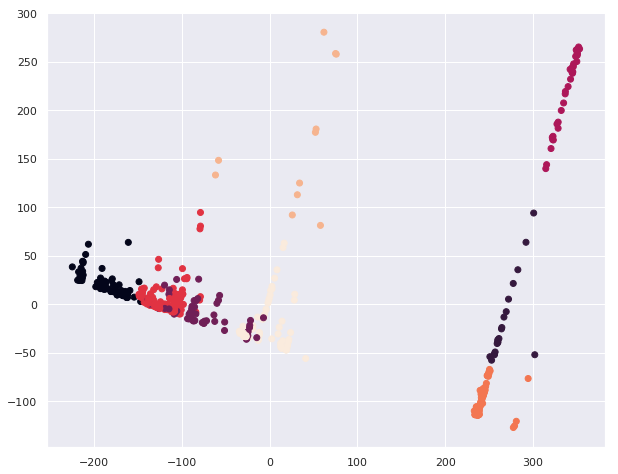

In [19]:
plt.figure(figsize=(10,8))
plt.scatter(C[:,0], C[:,1], c=classe) 
plt.show()

AFD

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
method = LinearDiscriminantAnalysis()
lda=method.fit(x_train, data["priceSeuil"])

NameError: ignored

In [4]:
Clda=lda.transform(X)
plt.figure(figsize=(10,6))
for i, j, nom in zip(Clda[:,0],Clda[:,1], data["priceSeuil"]):
    plt.scatter(i, j, color=nom)
plt.axis((-8,7,-4,6))  
plt.show()

NameError: ignored

## **3-Learining and prediction**


### **3.1- Extraction of learning and test samples**

In [0]:
from sklearn.model_selection import train_test_split  
X_train,X_test,Y_train,Y_test=train_test_split(x_train,label,test_size=200,random_state=11)


**Data Normalizarion**

In [0]:
from sklearn.preprocessing import StandardScaler  
# L'algorithme ds réseaux de neurones nécessite éventuellement une normalisation 
# des variables explicatives avec les commandes ci-dessous
scaler = StandardScaler()  
scaler.fit(X_train)  
Xr_train = scaler.transform(X_train)  
# Meme transformation sur le test
Xr_test = scaler.transform(X_test)
# Mais cela ne semnble pas nécessaire sur ces données.
# Les commandes sont donc fournies à titre indicatif.

**Linear regression**
-reg linear
-mse
-r2

In [82]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

regLasso = linear_model.Lasso()
regLasso.fit(Xr_train, Y_train)
prev = regLasso.predict(Xr_test)
print("MSE=", mean_squared_error(Y_test, prev))
print("R2=", r2_score(Y_test, prev))

MSE= 28.401175030404783
R2= 0.6642960284600323


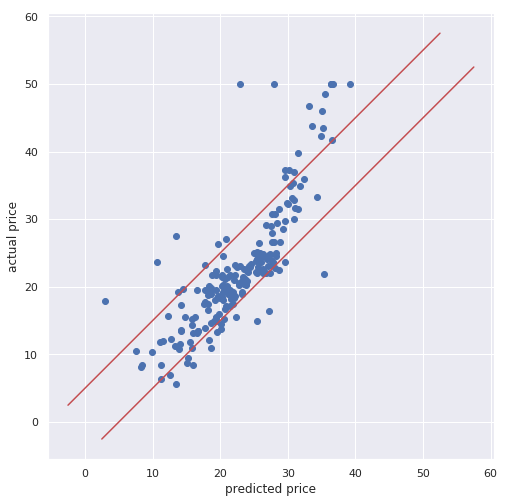

In [83]:
epsilon = 5
x = np.linspace(0, 55, 500)
plt.plot(prev,Y_test,"o")
plt.plot(x - epsilon/2, x + epsilon/2, 'r')
plt.plot(x + epsilon/2, x - epsilon/2, 'r')
plt.xlabel("predicted price")
plt.ylabel("actual price")
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()

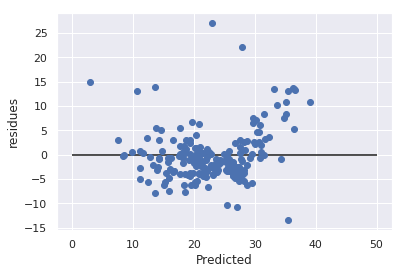

In [24]:
plt.plot(prev,Y_test-prev,"o")
plt.xlabel(u"Predicted")
plt.ylabel(u"residues")
plt.hlines(0, 0, 50)
plt.show()

know we will add a regularization 
-choosing the optimal parametre

In [25]:
from sklearn.model_selection import GridSearchCV
# grille de valeurs du paramètre alpha à optimiser
param=[{"alpha":[0.05,0.1,0.2,0.3,0.4,0.5,1]}]
regLasso = GridSearchCV(linear_model.Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(Xr_train, Y_train)
# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

Meilleur R2 = 0.652130, Meilleur paramètre = {'alpha': 0.05}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [84]:
prev=regLassOpt.predict(Xr_test)
print("MSE=",mean_squared_error(prev,Y_test))
print("R2=",r2_score(Y_test,prev))

MSE= 23.630330497748556
R2= 0.7206877606858244


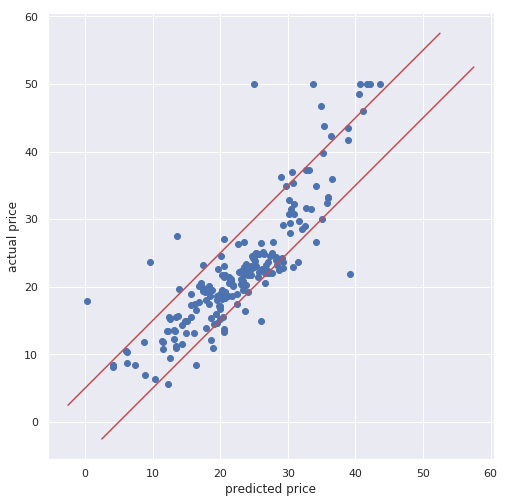

In [85]:
epsilon = 5
x = np.linspace(0, 55, 500)
plt.plot(prev,Y_test,"o")
plt.plot(x - epsilon/2, x + epsilon/2, 'r')
plt.plot(x + epsilon/2, x - epsilon/2, 'r')
plt.xlabel("predicted price")
plt.ylabel("actual price")
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()

In [27]:
# Coefficients
regLasso=linear_model.Lasso(alpha=regLassOpt.best_params_['alpha'])
model_lasso=regLasso.fit(Xr_train,Y_train)
model_lasso.coef_

array([-0.84012164,  0.58294299,  0.00777372,  0.79998117, -1.82038053,
        2.9034859 ,  0.47846684, -2.35714211,  2.23710568, -1.59117101,
       -1.91774562,  1.08842371, -3.78916111])

In [28]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables and delete " +  str(sum(coef == 0)))

Lasso conserve 13 variables and delete 0


Text(0.5, 1.0, 'Coefficients du modèle lasso')

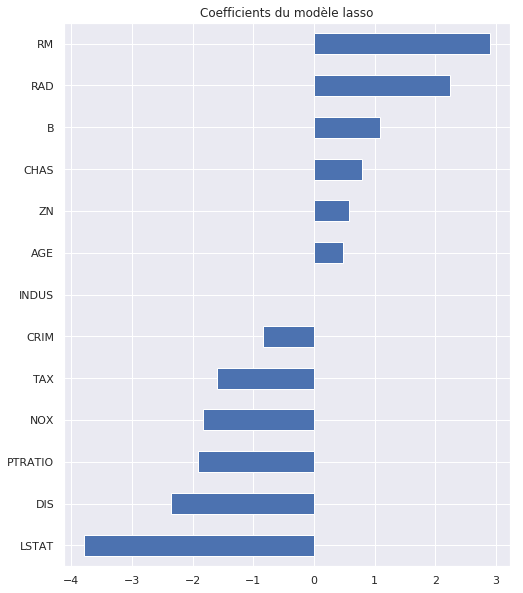

In [29]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso")

** Decision tree**

In [30]:
from sklearn.tree import DecisionTreeRegressor
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,10))}]
tree= GridSearchCV(DecisionTreeRegressor(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(Xr_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

Meilleur score = 0.327655, Meilleur paramètre = {'max_depth': 6}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [86]:
prev=treeOpt.predict(Xr_test)
print("MSE=",mean_squared_error(prev,Y_test))
print("R2=",r2_score(Y_test,prev))

MSE= 21.685642120918303
R2= 0.7436741199054917


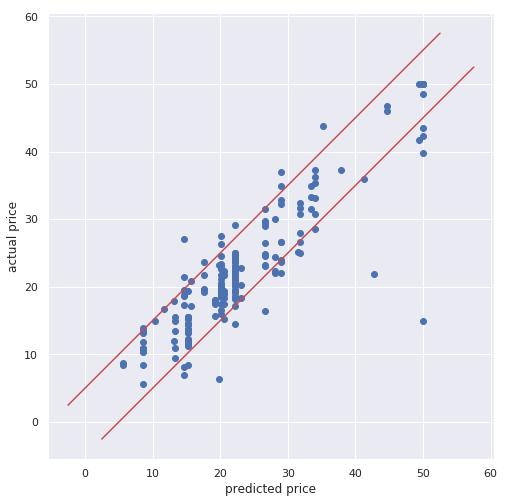

In [87]:
epsilon = 5
x = np.linspace(0, 55, 500)
plt.plot(prev,Y_test,"o")
plt.plot(x - epsilon/2, x + epsilon/2, 'r')
plt.plot(x + epsilon/2, x - epsilon/2, 'r')
plt.xlabel("predicted price")
plt.ylabel("actual price")
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()

**Visualization of th decsision Tree**

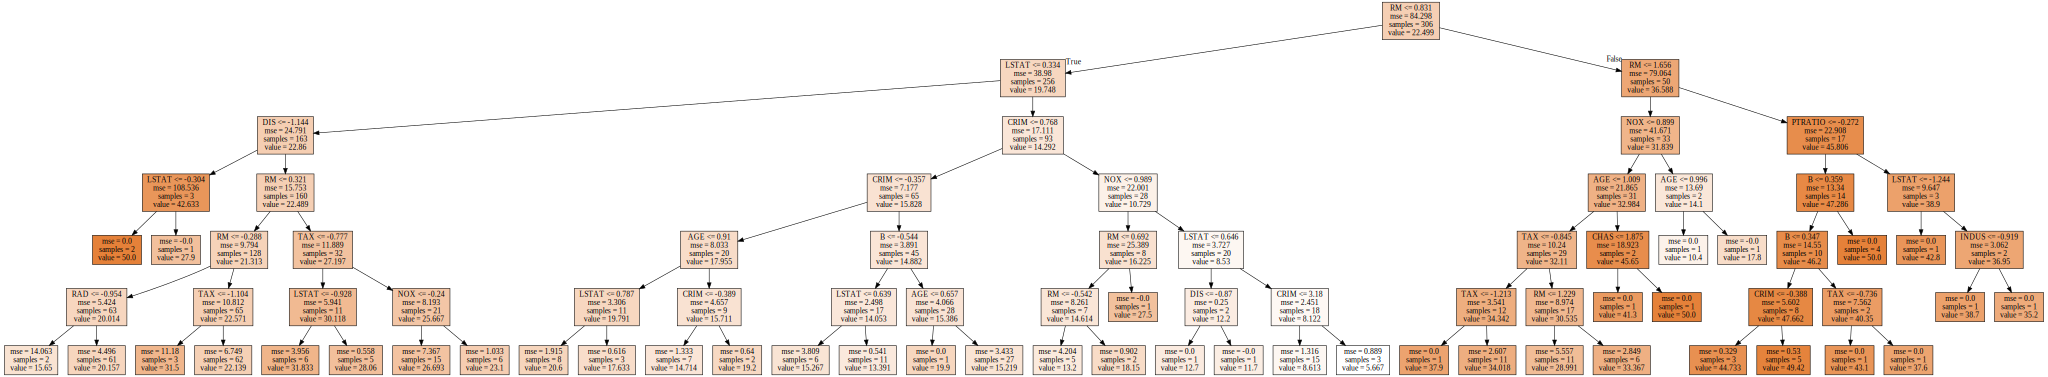

In [33]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
import pydotplus
treeG=DecisionTreeRegressor(max_depth=treeOpt.best_params_['max_depth'])
treeG.fit(Xr_train,Y_train)


labels = list(X_train)
#class_names = [str(item) for item in range(20)]
graph = Source(tree.export_graphviz(treeG, out_file=None
   , feature_names=labels
   , filled = True))
display(SVG(graph.pipe(format='svg')))

**Random forest**


In [34]:
from sklearn.ensemble import RandomForestRegressor 
# définition des paramètres
forest = RandomForestRegressor(n_estimators=500, 
   criterion='mse', max_depth=None,
   min_samples_split=2, min_samples_leaf=1, 
   max_features='auto', max_leaf_nodes=None,
   bootstrap=True, oob_score=True)
# apprentissage
rfFit = forest.fit(Xr_train,Y_train)
print(rfFit.oob_score_)

0.8342197340884702


In [88]:
prev=forest.predict(Xr_test)
print("MSE=",mean_squared_error(prev,Y_test))
print("R2=",r2_score(Y_test,prev))

MSE= 13.04366606300001
R2= 0.8458229106330116


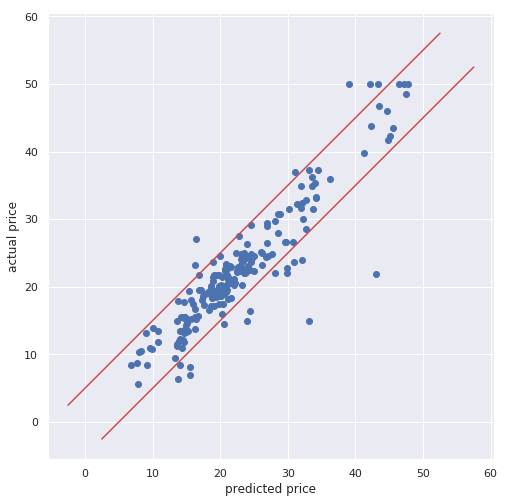

In [89]:
epsilon = 5
x = np.linspace(0, 55, 500)
plt.plot(prev,Y_test,"o")
plt.plot(x - epsilon/2, x + epsilon/2, 'r')
plt.plot(x + epsilon/2, x - epsilon/2, 'r')
plt.xlabel("predicted price")
plt.ylabel("actual price")
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()

**use cross validation and greed search**

In [37]:
param=[{"max_features":list(range(2,10,1))}]
rf= GridSearchCV(RandomForestRegressor(n_estimators=100),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(Xr_train, Y_train)
# paramètre optimal
print("Best params = %s" % (rfOpt.best_params_))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best params = {'max_features': 9}


In [90]:
prev=rfOpt.predict(Xr_test)
print("MSE=",mean_squared_error(prev,Y_test))
print("R2=",r2_score(Y_test,prev))

MSE= 11.211598555000002
R2= 0.8674780829245282


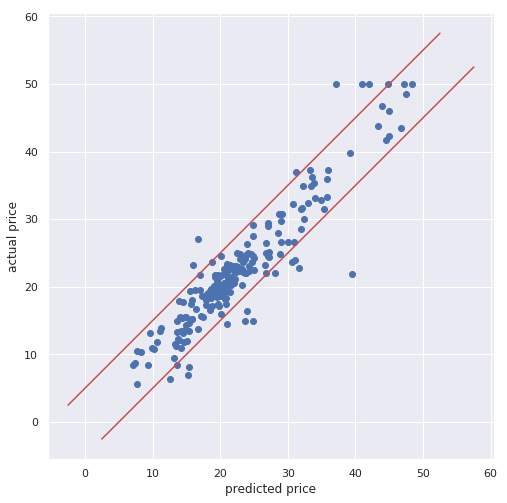

In [91]:
epsilon = 5
x = np.linspace(0, 55, 500)
plt.plot(prev,Y_test,"o")
plt.plot(x - epsilon/2, x + epsilon/2, 'r')
plt.plot(x + epsilon/2, x - epsilon/2, 'r')
plt.xlabel("predicted price")
plt.ylabel("actual price")
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()

In [40]:
rf= RandomForestRegressor(n_estimators=100,max_features=2)
rfFit=rf.fit(Xr_train, Y_train)
# Importance décroissante des variables
importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(Xr_train.shape[1]):
    print(data.columns[indices[f]], importances[indices[f]])

LSTAT 0.23305763956140124
RM 0.22246933785379108
CRIM 0.08701532857382678
PTRATIO 0.073689426581
NOX 0.07287429563322502
DIS 0.06849636361078937
INDUS 0.06285809777606564
AGE 0.04925898649736067
B 0.037085195123691184
TAX 0.03500792044562727
RAD 0.024410602735908168
ZN 0.020268498027254677
CHAS 0.013508307580058866


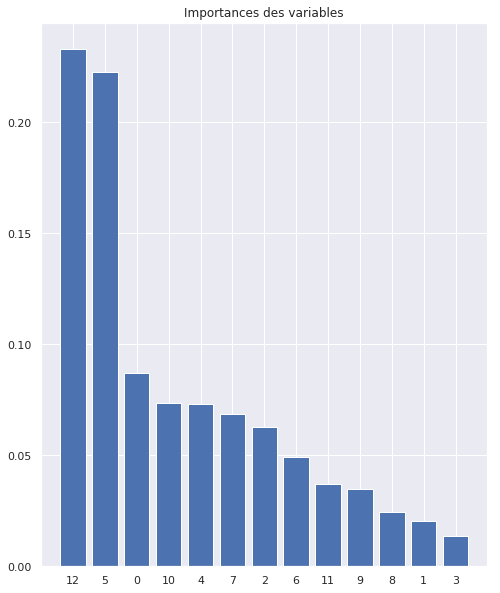

In [41]:
# Graphe des importances
plt.figure()
plt.title("Importances des variables")
plt.bar(range(Xr_train.shape[1]), importances[indices])
plt.xticks(range(Xr_train.shape[1]), indices)
plt.xlim([-1, Xr_train.shape[1]])
plt.show()

**Support Vector Machine**

In [42]:
from sklearn.svm import SVR
param=[{"C":[0.4,0.5,0.6,0.8,1,1.4]}]
svm= GridSearchCV(SVR(),param,cv=10,n_jobs=-1)
svmOpt=svm.fit(Xr_train, Y_train)
# paramètre optimal
print("Best param = %s" % ( svmOpt.best_params_))

Best param = {'C': 1.4}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [92]:
prev=svmOpt.predict(Xr_test)
print("MSE=",mean_squared_error(prev,Y_test))
print("R2=",r2_score(Y_test,prev))

MSE= 29.72887768880848
R2= 0.6486024856762167


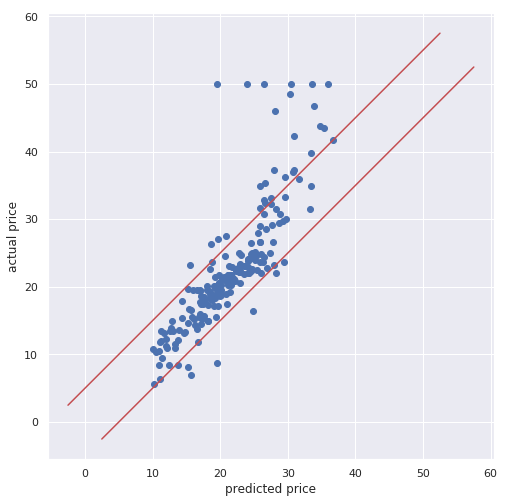

In [93]:
epsilon = 5
x = np.linspace(0, 55, 500)
plt.plot(prev,Y_test,"o")
plt.plot(x - epsilon/2, x + epsilon/2, 'r')
plt.plot(x + epsilon/2, x - epsilon/2, 'r')
plt.xlabel("predicted price")
plt.ylabel("actual price")
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()

**XGboost**


In [0]:
import xgboost
params = {"objective": "reg:linear", #since it is a regression problem
          "booster" : "gbtree",     #tree
          "eta": 0.03,              #learning rate   to reduce overfitting issues
          "max_depth": 10,          #depth of the tree
          "subsample": 0.9,         #subsample the data prior to growing trees - overcomes overfitting
          "colsample_bytree": 0.7,  #subsampling of columns for each tree
          "silent": 1,              #verbosity
          "seed": 10                
         }
#params = {"learning_rate": 0.01}
num_boost_round = 150         #countinue for 10 itertions
gbm = xgboost.train(params, xgboost.DMatrix(X_train, label=Y_train), num_boost_round,  verbose_eval=True)


In [94]:
prev = gbm.predict(xgboost.DMatrix(X_test))
print("MSE=",mean_squared_error(prev,Y_test))
print("R2=",r2_score(Y_test,prev))

MSE= 9.891053839552633
R2= 0.8830870182977024


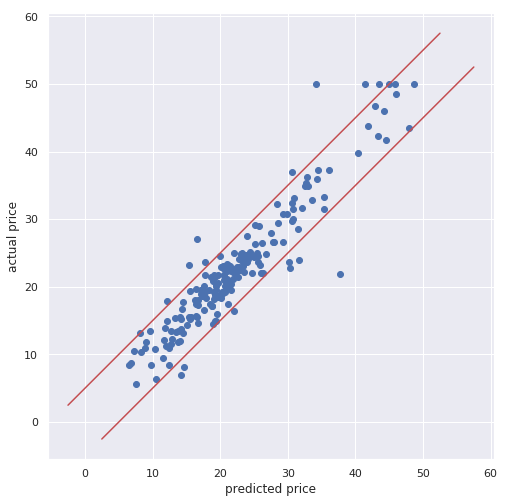

In [95]:
epsilon = 5
x = np.linspace(0, 55, 500)
plt.plot(prev,Y_test,"o")
plt.plot(x - epsilon/2, x + epsilon/2, 'r')
plt.plot(x + epsilon/2, x - epsilon/2, 'r')
plt.xlabel("predicted price")
plt.ylabel("actual price")
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()

**Interpretabilty**


In [48]:
shap.initjs()
#explain the model prediction using shap
explainer = shap.TreeExplainer(gbm)
shap_values = explainer.shap_values(X_train)

#visualize prediction explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0, :])


In [49]:
# visualize the training set predictions
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_train)

In [50]:
shap_values.shape[1]

13

In [51]:
shap_values

array([[ 4.07854229e-01,  1.27292853e-02, -2.62107491e-01, ...,
         6.34555280e-01,  2.98207968e-01, -4.46267414e+00],
       [ 4.09824878e-01,  4.41630110e-02,  1.04798384e-01, ...,
         8.85134578e-01,  2.32314795e-01,  1.60921264e+00],
       [ 1.35389850e-01, -6.41205385e-02,  5.65082967e-01, ...,
         1.12763035e+00,  2.66826719e-01,  2.43115497e+00],
       ...,
       [-4.81711589e-02, -1.19967619e-02, -7.61026889e-02, ...,
         6.19782228e-03,  1.05885275e-01,  3.72261715e+00],
       [ 3.10554951e-01, -3.71951144e-03,  2.54667640e-01, ...,
         1.03741610e+00,  2.31837466e-01,  5.44968987e+00],
       [-1.29753947e+00,  5.02139097e-03,  1.96532950e-01, ...,
         1.71341039e-02,  3.58574390e-01, -3.45928216e+00]], dtype=float32)

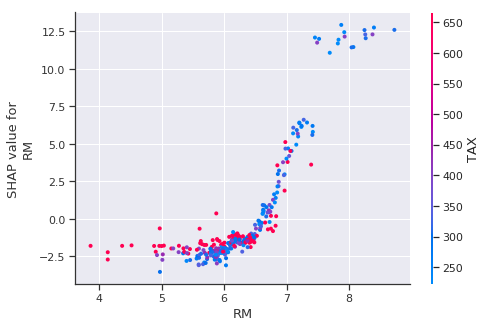

In [52]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("RM", shap_values, X_train)

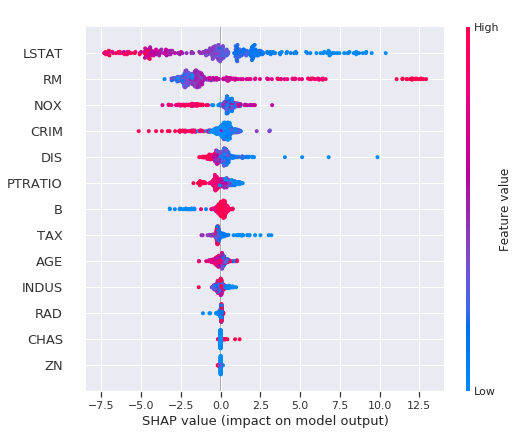

In [53]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_train)

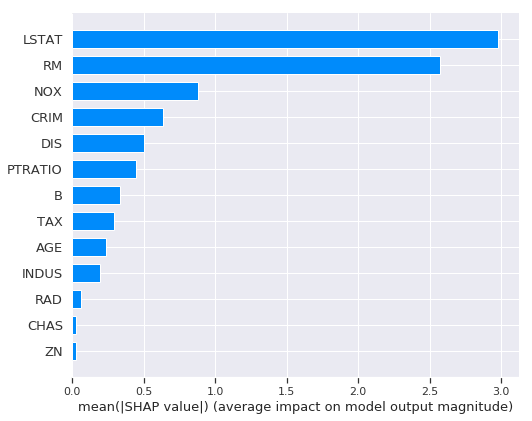

In [54]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [55]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,3.720793,9.578431,11.053595,0.058824,0.554025,6.265121,68.589869,3.841625,9.931373,410.421569,18.473856,355.356275,12.647386
std,8.774442,20.320838,6.679268,0.235680,0.116966,0.708720,27.152140,2.118366,8.853925,170.082917,2.112671,92.231837,7.062556
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.863000,6.200000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.080603,0.000000,5.190000,0.000000,0.449000,5.878500,45.725000,2.122250,4.000000,279.000000,17.400000,373.852500,7.390000
50%,0.253715,0.000000,9.690000,0.000000,0.535000,6.190000,75.500000,3.324600,5.000000,330.000000,18.950000,391.385000,11.310000
75%,3.821375,0.000000,18.100000,0.000000,0.624000,6.623500,93.525000,5.276650,24.000000,666.000000,20.200000,395.930000,16.492500
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


**Neural Network**

In [56]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout

#build our model
model = Sequential()

model.add(Dense(50, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0,5))
model.add(Dense(24, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


In [57]:
#saves the model weights after each epoch if the validation loss decreased
#checkpointer = ModelCheckpoint(filepath='/tmp/weights.hdf5', verbose=1, save_best_only=True)

model.fit(
    Xr_train,
    Y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=16,
    shuffle=True,
    #callbacks=([checkpointer]),
    verbose=1
)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 275 samples, validate on 31 samples
Epoch 1/100
275/275 [==============================] - 2s 9ms/step - loss: 548.3633 - acc: 0.0000e+00 - val_loss: 512.2749 - val_acc: 0.0000e+00
Epoch 2/100
275/275 [==============================] - 0s 251us/step - loss: 429.0224 - acc: 0.0000e+00 - val_loss: 340.8133 - val_acc: 0.0000e+00
Epoch 3/100
275/275 [==============================] - 0s 219us/step - loss: 223.6852 - acc: 0.0000e+00 - val_loss: 110.3560 - val_acc: 0.0000e+00
Epoch 4/100
275/275 [==============================] - 0s 237us/step - loss: 95.6721 - acc: 0.0036 - val_loss: 43.9877 - val_acc: 0.0323
Epoch 5/100
275/275 [==============================] - 0s 236us/step - loss: 60.0883 - acc: 0.0073 - val_loss: 33.4189 - val_acc: 0.0968
Epoch 6/100
275/275 [==============================] - 0s 233us/step - loss: 41

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


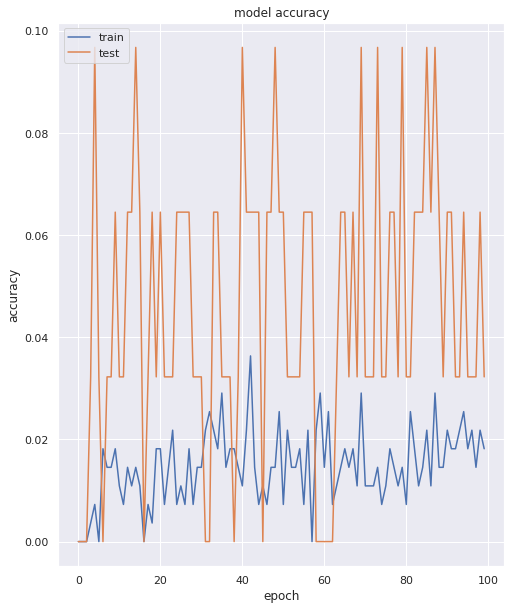

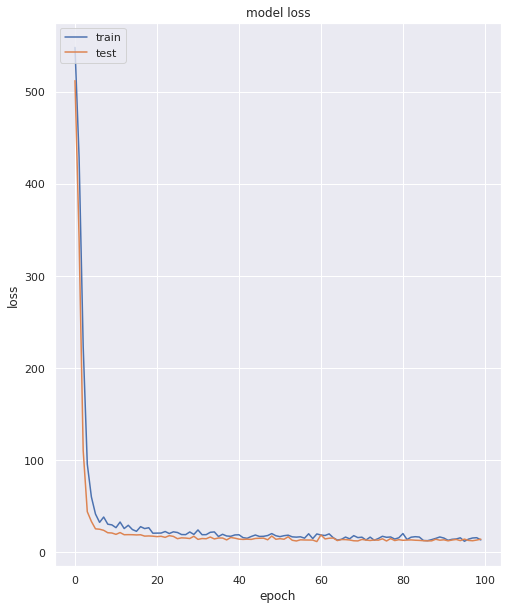

In [58]:
print(model.history.history.keys())
# summarize history for accuracy
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

`Think to use the stop criteria and use tensor flow low level api to design the neural net`

In [96]:
prev = model.predict(Xr_test)
print("MSE=",mean_squared_error(prev,Y_test))
print("R2=",r2_score(Y_test,prev))

MSE= 12.502724115940484
R2= 0.8522168841149551


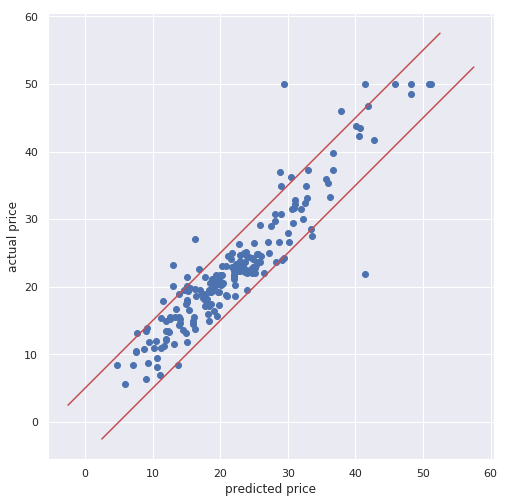

In [100]:
epsilon = 5
x = np.linspace(0, 55, 500)
plt.plot(prev,Y_test,"o")
plt.plot(x - epsilon/2, x + epsilon/2, 'r')
plt.plot(x + epsilon/2, x - epsilon/2, 'r')
plt.xlabel("predicted price")
plt.ylabel("actual price")
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()

In [61]:
e = shap.DeepExplainer(model= model, data=Xr_train)

shap_values = e.shap_values(Xr_train)
shap.initjs()
shap.force_plot(e.expected_value, shap_values[0][0], X_train.iloc[0,:])

In [62]:
# visualize the training set predictions
shap.initjs()
shap.force_plot(e.expected_value, shap_values[0], X_train)

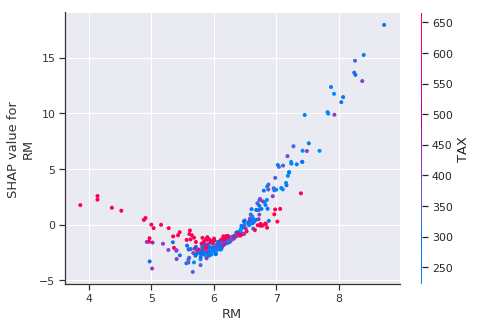

In [63]:
#create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("RM", shap_values[0], X_train)

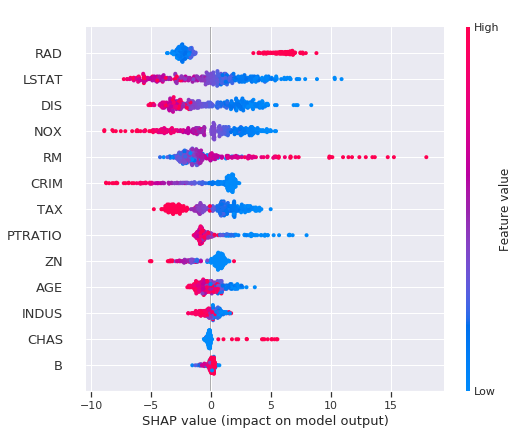

In [64]:
# summarize the effects of all the features
shap.summary_plot(shap_values[0], X_train)

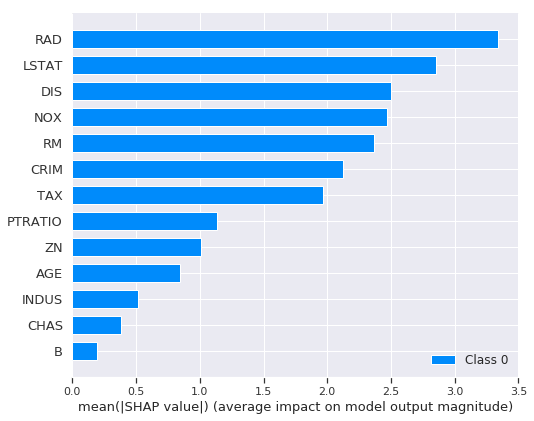

In [65]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

**Compare models**

In [0]:
listMethod=[["RF",rfOpt],["NN",model],["Tree",treeOpt],["xgb",gbm],["regLass",regLassOpt],["svm", svmOpt]]

In [182]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17735651282949682621
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 347470764648949952
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 2885748108787031866
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14782762189
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5440578157495120319
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]
